Dataset Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
sns.set_palette("deep")
np.random.seed(42)

In [2]:
df = pd.read_csv('synthetic_financial_data.csv')

print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [ ]:
# --- Data Exploration ---
print("Initial Data Shape:", df.shape)
print("\nData Info:")
df.info()

Initial Data Shape: (10000, 11)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [3]:
print("\nSummary Statistics (All Columns):")
df.describe(include='all')


Summary Statistics (All Columns):


,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
count,10000.00000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,10000,NaN,4,50,6,NaN,100
top,NaN,NaN,NaN,NaN,2023-01-01 00:00:00,NaN,Discover,City-7,Travel,NaN,Purchase at Merchant-2016
freq,NaN,NaN,NaN,NaN,1,NaN,2633,223,1694,NaN,120
mean,5000.50000,1051.272300,2050.486600,4958.381617,NaN,0.506800,NaN,NaN,NaN,44.047500,NaN
std,2886.89568,28.864062,28.877801,2899.699675,NaN,0.499979,NaN,NaN,NaN,15.321707,NaN
min,1.00000,1001.000000,2001.000000,10.610000,NaN,0.000000,NaN,NaN,NaN,18.000000,NaN
25%,2500.75000,1026.000000,2025.000000,2438.175000,NaN,0.000000,NaN,NaN,NaN,31.000000,NaN
50%,5000.50000,1052.000000,2050.000000,4943.945000,NaN,1.000000,NaN,NaN,NaN,44.000000,NaN
75%,7500.25000,1076.000000,2076.000000,7499.312500,NaN,1.000000,NaN,NaN,NaN,57.000000,NaN


In [5]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

Duplicate rows: 0


Exploratory Data Analysis (EDA)

Class Distribution (Fraud vs. Non-Fraud)

In [4]:
print("\nTarget Variable Distribution:")
fraud_percentage = df['is_fraudulent'].value_counts(normalize=True) * 100
print(f"Fraudulent transactions: {fraud_percentage[1]:.2f}%")
print(f"Legitimate transactions: {fraud_percentage[0]:.2f}%")


Target Variable Distribution:
Fraudulent transactions: 50.68%
Legitimate transactions: 49.32%


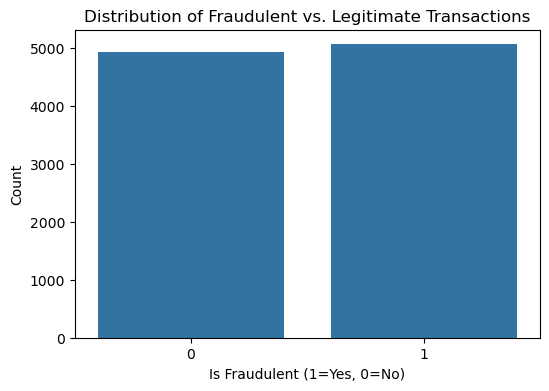

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraudulent', data=df)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Is Fraudulent (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

Amount Distribution by Fraud Status

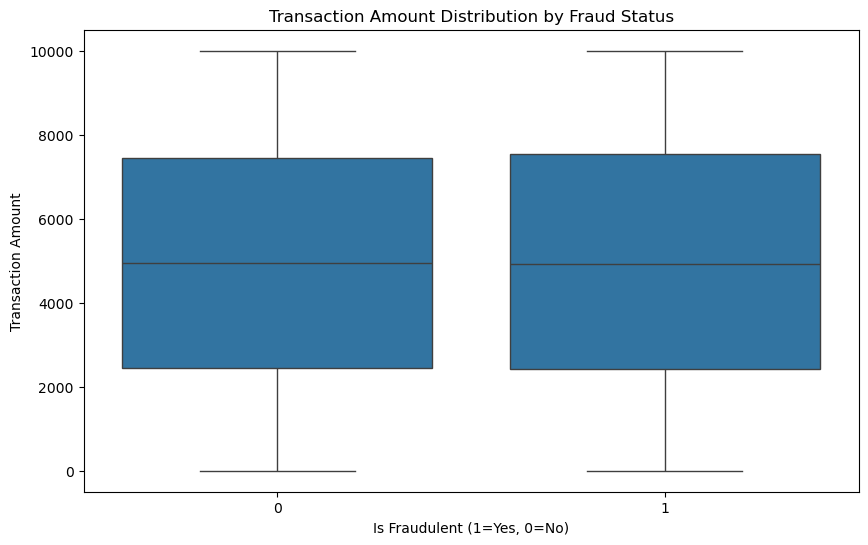

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraudulent', y='amount', data=df)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Is Fraudulent (1=Yes, 0=No)')
plt.ylabel('Transaction Amount')
plt.show()

Feature Relationships

Purchase Category vs. Fraud:


Analyzing Fraud by Purchase Category...


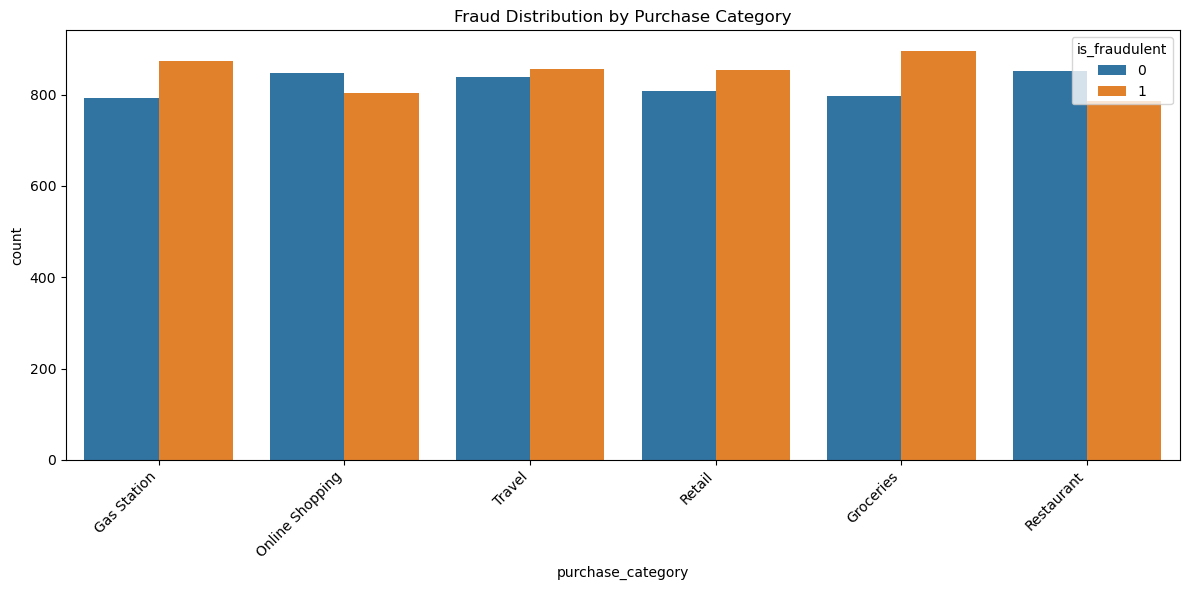

In [ ]:
print("\nAnalyzing Fraud by Purchase Category...")
plt.figure(figsize=(12, 6))
sns.countplot(x='purchase_category', hue='is_fraudulent', data=df)
plt.title('Fraud Distribution by Purchase Category')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

Card Type vs. Fraud:

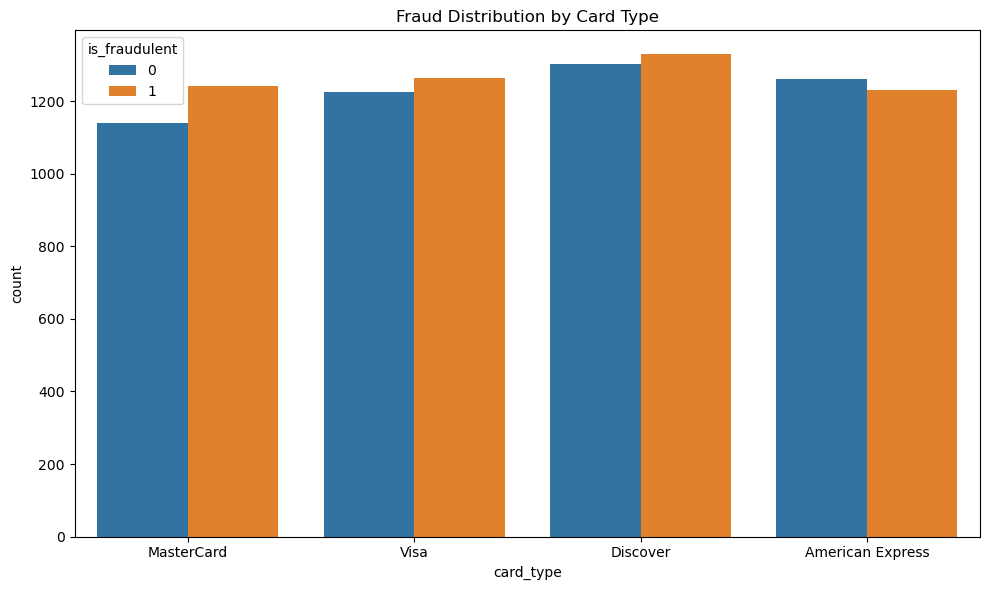

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='card_type', hue='is_fraudulent', data=df)
plt.title('Fraud Distribution by Card Type')
plt.tight_layout()
plt.show()

Data Cleaning and Preprocessing

In [14]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
hour                       0
dtype: int64

Label Encoding

In [12]:
# Encode categorical variables
cat_cols = ['card_type', 'location', 'purchase_category']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"Encoded '{col}'. Mappings: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Encoded 'card_type'. Mappings: {'American Express': 0, 'Discover': 1, 'MasterCard': 2, 'Visa': 3}
Encoded 'location'. Mappings: {'City-1': 0, 'City-10': 1, 'City-11': 2, 'City-12': 3, 'City-13': 4, 'City-14': 5, 'City-15': 6, 'City-16': 7, 'City-17': 8, 'City-18': 9, 'City-19': 10, 'City-2': 11, 'City-20': 12, 'City-21': 13, 'City-22': 14, 'City-23': 15, 'City-24': 16, 'City-25': 17, 'City-26': 18, 'City-27': 19, 'City-28': 20, 'City-29': 21, 'City-3': 22, 'City-30': 23, 'City-31': 24, 'City-32': 25, 'City-33': 26, 'City-34': 27, 'City-35': 28, 'City-36': 29, 'City-37': 30, 'City-38': 31, 'City-39': 32, 'City-4': 33, 'City-40': 34, 'City-41': 35, 'City-42': 36, 'City-43': 37, 'City-44': 38, 'City-45': 39, 'City-46': 40, 'City-47': 41, 'City-48': 42, 'City-49': 43, 'City-5': 44, 'City-50': 45, 'City-6': 46, 'City-7': 47, 'City-8': 48, 'City-9': 49}
Encoded 'purchase_category'. Mappings: {'Gas Station': 0, 'Groceries': 1, 'Online Shopping': 2, 'Restaurant': 3, 'Retail': 4, 'Travel': 5}


Numerical Feature Normalization

In [16]:
num_cols = ['amount', 'customer_age']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Feature Engineering

In [11]:
# Transaction frequency per customer (proxy for customer activity)
df['customer_txn_count'] = df.groupby('customer_id')['customer_id'].transform('count')

# Average transaction amount per customer
df['customer_avg_amount'] = df.groupby('customer_id')['amount'].transform('mean')

# Time since last transaction (in minutes)
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['time_since_last_txn'] = df.groupby('customer_id')['transaction_time'].diff().dt.total_seconds()/60
df['time_since_last_txn'].fillna(0, inplace=True)

print("Engineered features added: hour, customer_txn_count, customer_avg_amount, time_since_last_txn")
print("\nDataFrame head after feature engineering:")
print(df.head())

Engineered features added: hour, customer_txn_count, customer_avg_amount, time_since_last_txn

DataFrame head after feature engineering:
   transaction_id  customer_id  merchant_id   amount    transaction_time  \
0               1         1082         2027  5758.59 2023-01-01 00:00:00   
1               2         1015         2053  1901.56 2023-01-01 00:00:01   
2               3         1004         2035  1248.86 2023-01-01 00:00:02   
3               4         1095         2037  7619.05 2023-01-01 00:00:03   
4               5         1036         2083  1890.10 2023-01-01 00:00:04   

   is_fraudulent   card_type location purchase_category  customer_age  \
0              0  MasterCard  City-30       Gas Station            43   
1              1        Visa  City-47   Online Shopping            61   
2              1  MasterCard   City-6       Gas Station            57   
3              1    Discover   City-6            Travel            59   
4              1  MasterCard  City-34    

C:\Users\Admin\AppData\Local\Temp\ipykernel_15876\58844668.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time_since_last_txn'].fillna(0, inplace=True)


Correlation Analysis

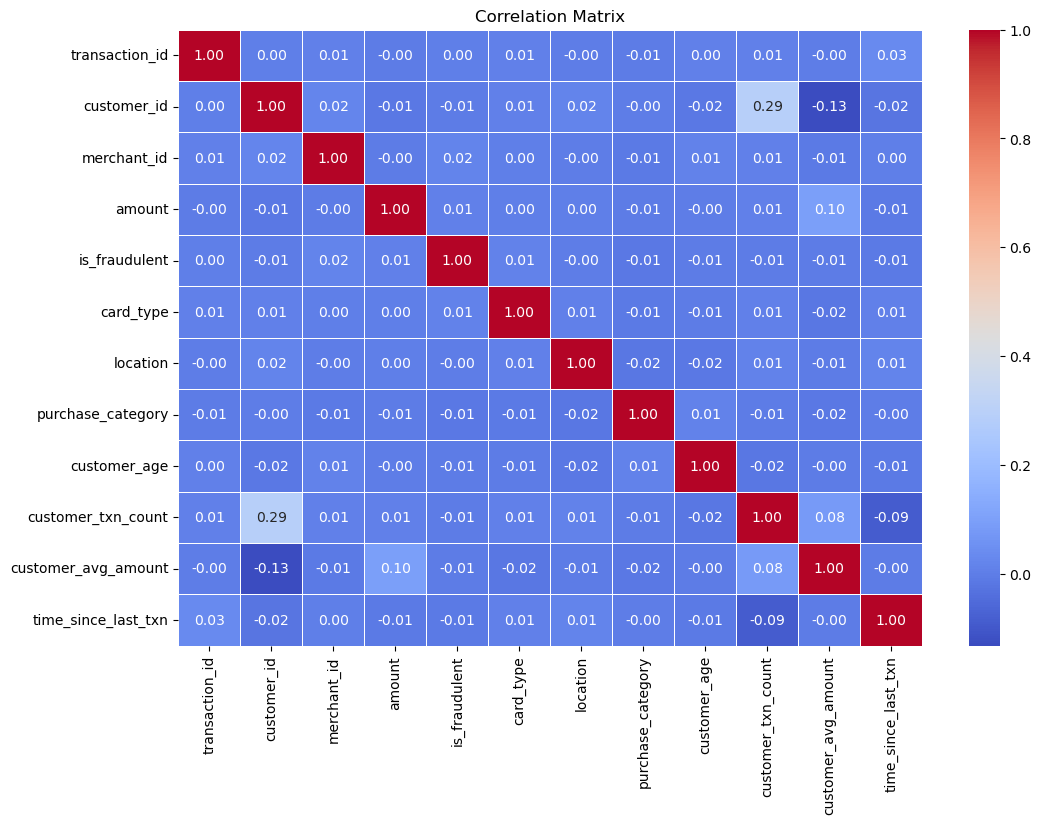

is_fraudulent          1.000000
merchant_id            0.016277
card_type              0.012789
amount                 0.005155
transaction_id         0.001991
location              -0.002670
customer_age          -0.005388
customer_id           -0.005981
customer_txn_count    -0.007750
customer_avg_amount   -0.008412
time_since_last_txn   -0.011298
purchase_category     -0.014836
Name: is_fraudulent, dtype: float64


In [ ]:
# Calculate correlation matrix
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.tight_layout
plt.show()

# Top correlations with fraud
print(corr_matrix['is_fraudulent'].sort_values(ascending=False))